# 1

In [1]:
import numpy
import os
import torch
import cv2
from sklearn.model_selection import train_test_split
import torch.nn as nn
import PIL.Image as Image
from PIL import Image
import matplotlib.pyplot as plt

In [3]:
file_path = [r"animals/cats", r"animals/dogs", r"animals/panda"]
categories = {0: "cat", 1: "dog", 2: "panda"}
def load_data():
    data = []
    for i in range(3):
        for file in os.listdir(file_path[i]):
            img = cv2.imread(file_path[i] + "/" + file) 
            data.append([img, i])
    return data
data = load_data()


panda


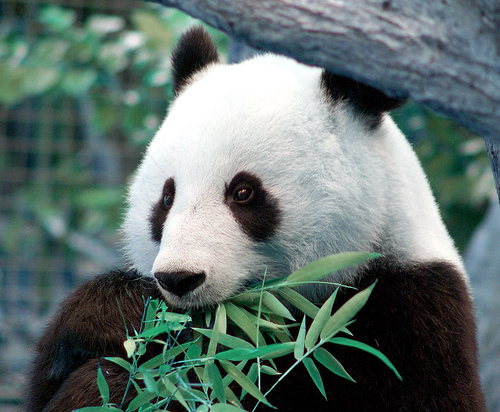

In [4]:
def display_an_image(data):
    idx = numpy.random.randint(0, len(data))
    img = data[idx][0]
    label = data[idx][1]
    img = Image.fromarray(img)
    print(categories[label])
    display(img)

display_an_image(data)

# 2

In [5]:
for i in range(len(data)):
    data[i][0] = cv2.resize(data[i][0], (224, 224))

idx = numpy.random.randint(0, len(data))
img = data[idx][0]
label = data[idx][1]

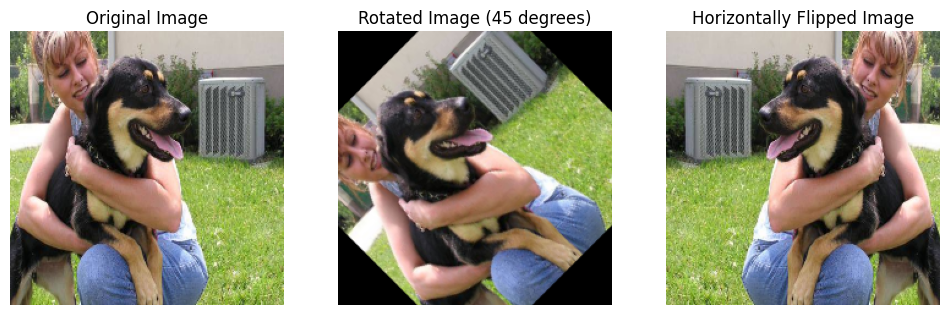

In [6]:
# Rotate the image by 45 degrees clockwise
angle = 45
rows, cols, _ = img.shape
M = cv2.getRotationMatrix2D((cols/2, rows/2), angle, 1)
rotated_img = cv2.warpAffine(img, M, (cols, rows))
# Flip the image horizontally
flipped_img = cv2.flip(img, 1)

# Display the original, rotated, and flipped images
plt.figure(figsize=(12, 6))

plt.subplot(1, 3, 1)
plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))
plt.title('Original Image')
plt.axis('off')

plt.subplot(1, 3, 2)
plt.imshow(cv2.cvtColor(rotated_img, cv2.COLOR_BGR2RGB))
plt.title('Rotated Image (45 degrees)')
plt.axis('off')

plt.subplot(1, 3, 3)
plt.imshow(cv2.cvtColor(flipped_img, cv2.COLOR_BGR2RGB))
plt.title('Horizontally Flipped Image')
plt.axis('off')

plt.show()

# 3

In [11]:
import cv2
import numpy as np

def extract_SIFT_feature(img_path):
    # Load an image
    image = cv2.imread(img_path)
    gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)

    # Initialize the SIFT detector
    sift = cv2.SIFT_create()

    # Find the keypoints and descriptors with SIFT
    keypoints, descriptors = sift.detectAndCompute(gray, None)

    # Save keypoints and descriptors to a file
    np.save(img_path + '_keypoints.npy', np.array([kp.pt for kp in keypoints]))
    np.save(img_path + '_descriptors.npy', descriptors)

def visualize_results():
    idx = [100,1100,2100,200,1200]
    for id in idx:
        img = data[id][0]
        gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
        sift = cv2.SIFT_create()
        keypoints, descriptors = sift.detectAndCompute(gray, None)
        img = cv2.drawKeypoints(gray, keypoints, img)
        plt.imshow(img)
        plt.show()



In [8]:
file_path = [r"animals/cats", r"animals/dogs", r"animals/panda"]

for files in file_path:
    for file in os.listdir(files):
        extract_SIFT_feature(files + "/" + file)


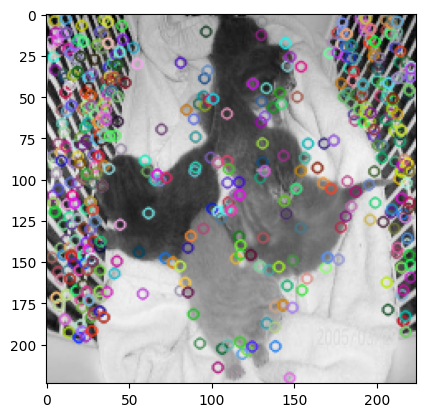

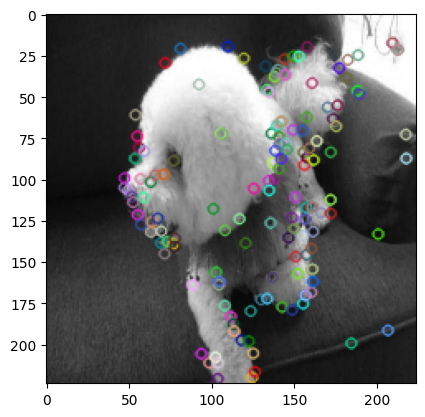

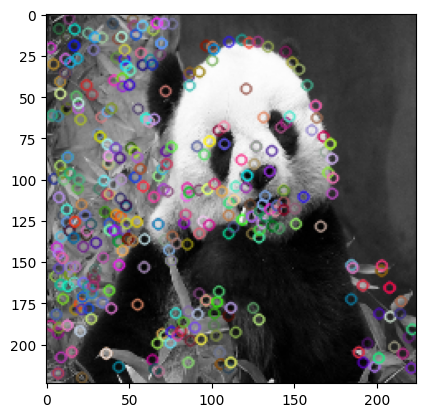

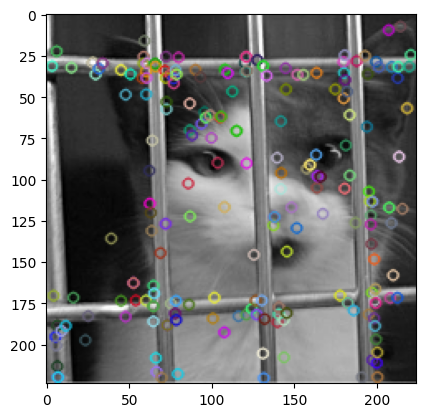

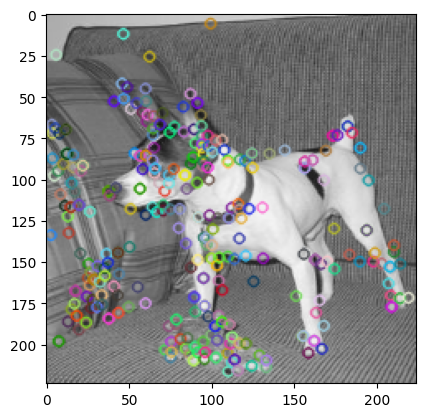

In [12]:
visualize_results()

# 4

In [14]:
#For all the features, apply with the K-Means algorithm. Discuss the influence of different values of k on the results.
import numpy as np
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt

def kmeans_clustering(k, descriptors):
    kmeans = KMeans(n_clusters=k, random_state=0)
    kmeans.fit(descriptors)
    return kmeans

def plot_clusters(kmeans, descriptors):
    plt.figure(figsize=(12, 6))
    for i in range(kmeans.n_clusters):
        cluster = descriptors[kmeans.labels_ == i]
        for descriptor in cluster:
            plt.plot(descriptor[0], descriptor[1], 'o', markersize=5)
    plt.title('K-Means Clustering with k = ' + str(kmeans.n_clusters))
    plt.show()

def visualize_kmeans_results(k, descriptors):
    kmeans = kmeans_clustering(k, descriptors)
    plot_clusters(kmeans, descriptors)


In [15]:
# Load the descriptors of the images

descriptors = []
for files in file_path:
    for file in os.listdir(files):
        if file.endswith(".jpg"):
            descriptors.append(np.load(files + "/" + file + '_descriptors.npy'))
descriptors = np.vstack(descriptors)

# Visualize the K-Means clustering results with different values of k
for k in [2, 3, 4, 5, 10]:
    visualize_kmeans_results(k, descriptors)


d:\Users\xyc\anaconda3\envs\d2l\Lib\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


KeyboardInterrupt: 

Error in callback <function _draw_all_if_interactive at 0x0000022742A08EA0> (for post_execute):


KeyboardInterrupt: 